<a href="https://colab.research.google.com/github/shaobingbing/AI-For-NLP/blob/master/tensorflow_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
graph = tf.Graph() # Create a graph
session = tf.InteractiveSession(graph = graph) # Create a Session

In [0]:
x = tf.placeholder(shape = [1,10], dtype = tf.float32, name = 'x')   # provide a value when runtime
W = tf.Variable(tf.random_uniform(shape = [10, 5], minval = 0.1, maxval = 0.1, dtype = tf.float32), name = 'W')  # random initialization to [-0.1, 0.1] 
b = tf.Variable(tf.zeros(shape = [5], dtype = tf.float32), name = 'b')  #initialized to zeros
h = tf.nn.sigmoid(tf.matmul(x, W) + b)    # output

In [0]:
tf.global_variables_initializer().run()      # initialized the global variable(W, b)

In [0]:
h_val = session.run(h, feed_dict = {x: np.random.rand(1,10)})

In [0]:
session.close()

In [7]:
print(h_val)

[[0.6306386  0.6306386  0.6306386  0.6306386  0.63063866]]


### use constant

In [8]:
graph = tf.Graph()
session = tf.InteractiveSession(graph = graph)

# Building as graph

# x: pre-loaded
x = tf.constant(value = [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]], dtype = tf.float32, name = 'x')
W = tf.Variable(tf.random_uniform(shape = [10,5], minval = -0.1, maxval = 0.1, dtype = tf.float32))
b = tf.Variable(tf.zeros(shape = [5], dtype = tf.float32), name = 'b')
h = tf.nn.sigmoid(tf.matmul(x,W) + b)

# execute
tf.global_variables_initializer().run()

e_val = session.run(h)
print(e_val)
session.close()

[[0.4806654  0.4930861  0.5424131  0.47061113 0.44207993]]


### use input pipe

In [9]:
import tensorflow as tf
import numpy as np

# Create as graph
graph = tf.Graph()
session = tf.InteractiveSession(graph = graph)

# file queue
filenames = ['test%d.txt' %i for i in range(1,4)]
filename_queue = tf.train.string_input_producer(filenames, capacity = 3, shuffle = True, name = 'string_input_producer')

# check the files
for i in filenames:
    if not tf.gfile.Exists(i):
        raise ValueError('Failed to find file: ' + i)
    else:
        print('File %s found.' %i)
    
reader = tf.TextLineReader()
key, value = reader.read(filename_queue, name = 'text_read_op')

record_defaults = [[-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0]]
col1, col2, col3, col4, col5, col6, col7, col8, col9, col10 = tf.decode_csv(value, record_defaults = record_defaults)

features = tf.stack([col1, col2, col3, col4, col5, col6, col7, col8, col9, col10])

x = tf.train.shuffle_batch([features], batch_size = 3, capacity = 5, name = 'data_batch', min_after_dequeue = 1, num_threads = 1)

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord = coord, sess = session)

W = tf.Variable(tf.random_uniform(shape = [10,5], dtype = tf.float32, minval = -0.1, maxval = 0.1), name = 'W')
b = tf.Variable(tf.zeros(shape = [5], dtype = tf.float32), name = 'b')
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

tf.global_variables_initializer().run()

for step in range(5):
    x_eval, h_eval = session.run([x,h]) 
    print('========== Step %d =========='%step)
    print('Evaluated data (x)')
    print(x_eval)
    print('Evaluated data (h)')
    print(h_eval)
    print('')
    
coord.request_stop()
coord.join(threads)
session.close()

W0906 03:51:09.946339 140049116563328 deprecation.py:323] From <ipython-input-9-6bb1610a56b2>:10: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0906 03:51:09.955330 140049116563328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:278: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0906

File test1.txt found.
File test2.txt found.
File test3.txt found.
========== Step 0 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated data (h)
[[0.4932256  0.49977025 0.5040365  0.50682366 0.5021194 ]
 [0.4932256  0.49977025 0.5040365  0.50682366 0.5021194 ]
 [0.4932256  0.49977025 0.5040364  0.50682366 0.5021194 ]]

========== Step 1 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated data (h)
[[0.4932256  0.49977025 0.5040365  0.50682366 0.5021194 ]
 [0.4932256  0.49977025 0.5040365  0.50682366 0.5021194 ]
 [0.4932256  0.49977025 0.5040364  0.50682366 0.5021194 ]]

========== Step 2 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated 

### compare

In [0]:
x = tf.constant([[1, 2], [3, 4]], dtype = tf.int32)
y = tf.constant([[4,3], [3,2]], dtype = tf.int32)

In [11]:
x_equal_y = tf.equal(x,y, name = None)
session = tf.InteractiveSession()
session.run(x_equal_y)

array([[False, False],
       [ True, False]])

In [12]:
x_less_y = tf.less(x, y, name = None)
session.run(x_less_y)

array([[ True,  True],
       [False, False]])

In [13]:
x_great_equal_y = tf.greater_equal(x, y, name = None)
session.run(x_great_equal_y)

array([[False, False],
       [ True,  True]])

In [14]:
condition = tf.constant([[True, False], [True, False]], dtype = tf.bool)
x_cond_y = tf.where(condition, x, y, name = None)
session.run(x_cond_y)

W0906 03:51:10.117748 140049116563328 deprecation.py:323] From <ipython-input-14-e94931e97974>:2: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


array([[1, 3],
       [3, 2]], dtype=int32)

### numerical computation

In [15]:
x_add_y = tf.add(x, y)
session.run(x_add_y)

array([[5, 5],
       [6, 6]], dtype=int32)

In [16]:
x_mul_y = tf.matmul(x, y)
session.run(x_mul_y)

array([[10,  7],
       [24, 17]], dtype=int32)

In [17]:
log_x = tf.log(tf.cast(x, dtype = tf.float32))
session.run(log_x)

array([[0.       , 0.6931472],
       [1.0986123, 1.3862944]], dtype=float32)

In [18]:
x_sum_1 = tf.reduce_sum(x, axis = [1], keepdims = False)
session.run(x_sum_1)

array([3, 7], dtype=int32)

In [19]:
x_sum_1 = tf.reduce_sum(x, axis = [0], keepdims = False)
session.run(x_sum_1)

array([4, 6], dtype=int32)

In [20]:
data = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype = tf.float32)
segment_ids = tf.constant([0, 0, 0, 1, 1, 2, 2, 2, 2, 2], dtype = tf.int32)
x_seg_sum = tf.segment_sum(data, segment_ids)
session.run(x_seg_sum)

array([ 6.,  9., 40.], dtype=float32)

### split and join

In [21]:
ref = tf.Variable(tf.constant([1, 9, 3, 10, 5], dtype = tf.float32), name = 'scatter_update')
indices = [1, 3]
updates = tf.constant([2, 4], dtype = tf.float32)
tf_scatter_update = tf.scatter_update(ref, indices, updates, use_locking= None, name = None)

tf.global_variables_initializer().run()
session.run(tf_scatter_update)

array([1., 2., 3., 4., 5.], dtype=float32)

In [22]:
indices = [[1], [3]]
updates = tf.constant([[1, 1, 1], [2, 2, 2]])
shape = [4, 3]
tf_scatter_nd_1 = tf.scatter_nd(indices, updates, shape, name = None)
session.run(tf_scatter_nd_1)

array([[0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [2, 2, 2]], dtype=int32)

In [23]:
indices = [[1, 0], [3, 1]]
updates = tf.constant([1, 2])
shape = [4, 3]
tf_scatter_nd_1 = tf.scatter_nd(indices, updates, shape, name = None)
session.run(tf_scatter_nd_1)

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 2, 0]], dtype=int32)

In [24]:
params = tf.constant([1,2,3,4,5],dtype=tf.float32)
indices = [1,4]
tf_gather = tf.gather(params, indices, validate_indices=True, name=None) #=> [2,5]
print('\nGather Operation for 1-D')
print(session.run(tf_gather))


Gather Operation for 1-D
[2. 5.]


In [25]:
params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]],dtype=tf.float32)
indices = [[0],[2]]
tf_gather_nd = tf.gather_nd(params, indices, name=None) #=> [[0,0,0],[2,2,2]]
print('\nGather Operation for n-D')
print(session.run(tf_gather_nd))


Gather Operation for n-D
[[0. 0. 0.]
 [2. 2. 2.]]


In [26]:
params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]],dtype=tf.float32)
indices = [[0,1],[2,2]]
tf_gather_nd_2 = tf.gather_nd(params, indices, name=None) #=> [[0,0,0],[2,2,2]]
print('\nGather Operation for n-D')
print(session.run(tf_gather_nd_2))


Gather Operation for n-D
[0. 2.]


In [0]:
session.close()

### neural network ralted operation

In [31]:
# convolution operator

graph = tf.Graph()
session = tf.InteractiveSession(graph = graph)
x = tf.constant(
[[
    [[1], [2], [3], [4]],
    [[4], [3], [2], [1]],
    [[5], [6], [7], [8]],
    [[8], [7], [6], [5]]
]], dtype = tf.float32)

x_filter = tf.constant([
    [
        [[0.5]], [[1]]
    ],
    [
        [[0.5]], [[1]]
    ]
], dtype = tf.float32)

x_stride = [1, 1, 1, 1]
x_padding = 'VALID'

x_conv = tf.nn.conv2d(input = x, filter = x_filter, strides = x_stride, padding = x_padding)
session.run(x_conv)

array([[[[ 7.5],
         [ 7.5],
         [ 7.5]],

        [[13.5],
         [13.5],
         [13.5]],

        [[19.5],
         [19.5],
         [19.5]]]], dtype=float32)

In [32]:
# pool operator
x = tf.constant(
    [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]],
    dtype=tf.float32)

x_ksize = [1,2,2,1]
x_stride = [1,2,2,1]
x_padding = 'VALID'

x_pool = tf.nn.max_pool(
    value=x, ksize=x_ksize,
    strides=x_stride, padding=x_padding
)

session.run(x_pool)

array([[[[4.],
         [4.]],

        [[8.],
         [8.]]]], dtype=float32)

In [0]:
session.close()

### Loss function

In [35]:
# l2 loss
graph = tf.Graph()
session = tf.InteractiveSession(graph = graph)

x = tf.constant([[2, 4], [6, 8]], dtype = tf.float32)
x_hat = tf.constant([[1, 2], [3, 4]], dtype = tf.float32)

# MSE: mean square error
MSE = tf.nn.l2_loss(x - x_hat)
session.run(MSE)

15.0

In [36]:
# cross entropy loss
y = tf.constant([[1, 0], [0, 1]], dtype = tf.float32)
y_hat = tf.constant([[3, 1], [2, 5]], dtype = tf.float32)

CE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_hat, labels = y))
session.run(CE)

0.08775769

In [38]:
session.run(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_hat, labels = y))

array([0.12692805, 0.04858733], dtype=float32)

In [0]:
session.close()

### Optimization

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step:  0 , x:  2.0 , y:  4.0
Step:  1 , x:  1.28 , y:  2.5600002
Step:  2 , x:  1.28 , y:  1.6384
Step:  3 , x:  1.0239999 , y:  1.0485759
Step:  4 , x:  0.6553599 , y:  0.6710885


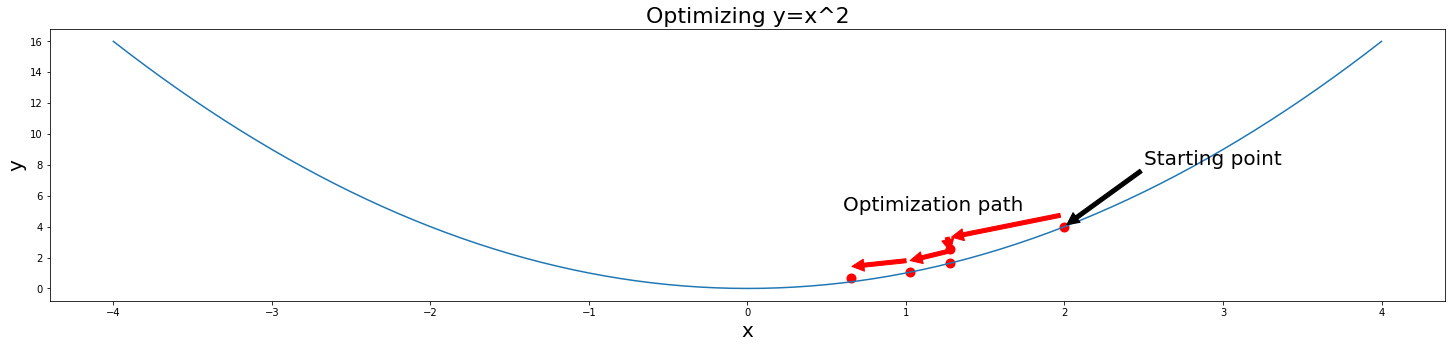

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
graph = tf.get_default_graph()
session = tf.InteractiveSession(graph = graph)

tf_x = tf.Variable(tf.constant(2.0, dtype = tf.float32), name = 'x')
tf_y = tf_x ** 2;
minimize_op = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(tf_y)

x_series, y_series = [], []
tf.global_variables_initializer().run()
for step in range(5):
    _, x, y = session.run([minimize_op, tf_x, tf_y])
    print('Step: ', step, ', x: ', x, ', y: ', y)
    x_series.append(x)
    y_series.append(y)
  
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=25,h=5)
ax.plot(np.arange(-4,4.1,0.1),np.arange(-4,4.1,0.1)**2)
ax.scatter(x_series,y_series,c='red',linewidths=4)

x_offset, y_offset = 0.02, 0.75
ax.annotate('Starting point', xy=(2.01, 4.1), xytext=(2.5, 8),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=20
            )

ax.annotate('Optimization path', xy=(2.01, 4.1), xytext=(0.6, 5),
            arrowprops=None,fontsize=20
            )


for index,(x,y) in enumerate(zip(x_series,y_series)):
    if index == len(x_series)-1:
        break
    ax.annotate('', xy=(x_series[index+1], y_series[index+1]+y_offset), xytext=( x - x_offset, y + y_offset),
                arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.01),fontsize=20
                )

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Optimizing y=x^2',fontsize=22)
fig.savefig('optimization.jpg')
session.close()

### Control stream

In [43]:
session = tf.InteractiveSession()

x = tf.Variable(tf.constant(2.0), name = 'x')
x_assign_op = tf.assign(x, x + 5)
z = x*2
tf.global_variables_initializer().run()

print('z = ', session.run(z))
print('x = ', session.run(x))

z =  4.0
x =  2.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [44]:
x = tf.Variable(tf.constant(2.0), name='x')
with tf.control_dependencies([tf.assign(x, x+5)]):
  z = x*2

tf.global_variables_initializer().run()

print('z=',session.run(z))
print('x=',session.run(x))

session.close()

z= 14.0
x= 7.0


### MINST

In [110]:
import struct
import gzip
import os
from six.moves.urllib.request import urlretrieve

def maybe_download(url, filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename


def read_mnist(fname_img, fname_lbl):
    print('\nReading files %s and %s'%(fname_img, fname_lbl))
    
    with gzip.open(fname_img) as fimg:        
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        print(num,rows,cols)
        img = (np.frombuffer(fimg.read(num*rows*cols), dtype=np.uint8).reshape(num, rows * cols)).astype(np.float32)
        print('(Images) Returned a tensor of shape ',img.shape)
        
        img = (img - np.mean(img))/np.std(img)
        
    with gzip.open(fname_lbl) as flbl:
        # flbl.read(8) reads upto 8 bytes
        magic, num = struct.unpack(">II", flbl.read(8))        
        lbl = np.frombuffer(flbl.read(num), dtype=np.int8)
        print('(Labels) Returned a tensor of shape: %s'%lbl.shape)
        print('Sample labels: ',lbl[:10])
        
    return img, lbl
    
    
# Download data if needed
url = 'http://yann.lecun.com/exdb/mnist/'
# training data
maybe_download(url,'train-images-idx3-ubyte.gz',9912422)
maybe_download(url,'train-labels-idx1-ubyte.gz',28881)
# testing data
maybe_download(url,'t10k-images-idx3-ubyte.gz',1648877)
maybe_download(url,'t10k-labels-idx1-ubyte.gz',4542)

# Read the training and testing data 
train_inputs, train_labels = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_inputs, test_labels = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

Attempting to download: train-images-idx3-ubyte.gz

Download Complete!
Found and verified train-images-idx3-ubyte.gz
Attempting to download: train-labels-idx1-ubyte.gz

Download Complete!
Found and verified train-labels-idx1-ubyte.gz
Attempting to download: t10k-images-idx3-ubyte.gz

Download Complete!
Found and verified t10k-images-idx3-ubyte.gz
Attempting to download: t10k-labels-idx1-ubyte.gz

Download Complete!
Found and verified t10k-labels-idx1-ubyte.gz

Reading files train-images-idx3-ubyte.gz and train-labels-idx1-ubyte.gz
60000 28 28
(Images) Returned a tensor of shape  (60000, 784)
(Labels) Returned a tensor of shape: 60000
Sample labels:  [5 0 4 1 9 2 1 3 1 4]

Reading files t10k-images-idx3-ubyte.gz and t10k-labels-idx1-ubyte.gz
10000 28 28
(Images) Returned a tensor of shape  (10000, 784)
(Labels) Returned a tensor of shape: 10000
Sample labels:  [7 2 1 0 4 1 4 9 5 9]


In [0]:
WEIGHTS_STRING = 'weights'
BIAS_STRING = 'bias'

batch_size = 100

img_width, img_height = 28,28
input_size = img_height * img_width
num_labels = 10

In [0]:
tf_inputs = tf.placeholder(shape=[batch_size, input_size], dtype=tf.float32, name = 'inputs')
tf_labels = tf.placeholder(shape=[batch_size, num_labels], dtype=tf.float32, name = 'labels')

In [0]:
# Defining the Tensorflow variables
def define_net_parameters():
    with tf.variable_scope('layer1'):
        tf.get_variable(WEIGHTS_STRING,shape=[input_size,500],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[500],
                           initializer=tf.random_uniform_initializer(0,0.01))
        
    with tf.variable_scope('layer2'):
        tf.get_variable(WEIGHTS_STRING,shape=[500,250],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[250],
                           initializer=tf.random_uniform_initializer(0,0.01))
    
    with tf.variable_scope('output'):
        tf.get_variable(WEIGHTS_STRING,shape=[250,10],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[10],
                           initializer=tf.random_uniform_initializer(0,0.01))

In [0]:
def inference(x):
    # calculations for layer 1
    with tf.variable_scope('layer1',reuse=True):
        w,b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_h1 = tf.nn.relu(tf.matmul(x,w) + b, name = 'hidden1')

    # calculations for layer 2
    with tf.variable_scope('layer2',reuse=True):
        w,b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_h2 = tf.nn.relu(tf.matmul(tf_h1,w) + b, name = 'hidden1')

    # calculations for output layer
    with tf.variable_scope('output',reuse=True):
        w,b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_logits = tf.nn.bias_add(tf.matmul(tf_h2,w), b, name = 'logits')

    return tf_logits

In [0]:
define_net_parameters()

# defining the loss
tf_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=inference(tf_inputs), labels=tf_labels))

# defining the optimize function
tf_loss_minimize = tf.train.MomentumOptimizer(momentum=0.9,learning_rate=0.01).minimize(tf_loss)

In [0]:
# defining predictions
tf_predictions = tf.nn.softmax(inference(tf_inputs))

In [119]:
session = tf.InteractiveSession()

tf.global_variables_initializer().run()

NUM_EPOCHS = 50

def accuracy(predictions, labels):
    ''' Measure the classification accuracy of some predictions (softmax outputs) 
    and labels (integer class labels)'''
    return np.sum(np.argmax(predictions,axis=1).flatten()==labels.flatten())/batch_size

test_accuracy_over_time = []
train_loss_over_time = []

for epoch in range(NUM_EPOCHS):
    train_loss = []
    
    # Training Phase 
    for step in range(train_inputs.shape[0]//batch_size):
        # Creating one-hot encoded labels with labels
        # One-hot encoding dight 3 for 10-class MNIST data set will result in
        # [0,0,0,1,0,0,0,0,0,0]
        labels_one_hot = np.zeros((batch_size, num_labels),dtype=np.float32)
        labels_one_hot[np.arange(batch_size),train_labels[step*batch_size:(step+1)*batch_size]] = 1.0
        
        # Printing the one-hot labels
        if epoch ==0 and step==0:
            print('Sample labels (one-hot)')
            print(labels_one_hot[:10])
            print()
        
        # Running the optimization process
        loss, _ = session.run([tf_loss,tf_loss_minimize],feed_dict={
            tf_inputs: train_inputs[step*batch_size: (step+1)*batch_size,:],
            tf_labels: labels_one_hot}
                             )
        train_loss.append(loss) # Used to average the loss for a single epoch
        
    test_accuracy = []
    # Testing Phase
    for step in range(test_inputs.shape[0]//batch_size):
        test_predictions = session.run(tf_predictions,feed_dict={tf_inputs: test_inputs[step*batch_size: (step+1)*batch_size,:]})
        batch_test_accuracy = accuracy(test_predictions,test_labels[step*batch_size: (step+1)*batch_size])        
        test_accuracy.append(batch_test_accuracy)
    
    print('Average train loss for the %d epoch: %.3f\n'%(epoch+1,np.mean(train_loss)))
    train_loss_over_time.append(np.mean(train_loss))
    print('\tAverage test accuracy for the %d epoch: %.2f\n'%(epoch+1,np.mean(test_accuracy)*100.0))
    test_accuracy_over_time.append(np.mean(test_accuracy)*100)
    
session.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Sample labels (one-hot)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Average train loss for the 1 epoch: 0.448

	Average test accuracy for the 1 epoch: 94.64

Average train loss for the 2 epoch: 0.140

	Average test accuracy for the 2 epoch: 96.30

Average train loss for the 3 epoch: 0.090

	Average test accuracy for the 3 epoch: 96.94

Average train loss for the 4 epoch: 0.063

	Average test accuracy for the 4 epoch: 97.24

Average train loss for the 5 epoch: 0.047

	Average test accuracy for the 5 epoch: 97.60

Average train loss for the 6 epoch: 0.035

	Average test accuracy for the 6 epoch: 97.77

Average train loss for the 7 epoch: 0.025

	Average test accuracy for the 7 epoch: 97.78

Average train 

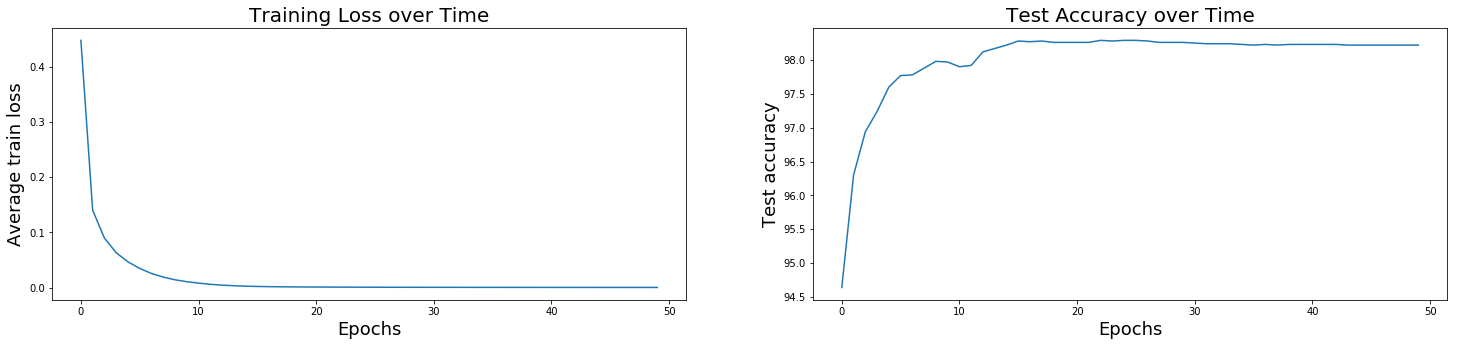

In [120]:

x_axis = np.arange(len(train_loss_over_time))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=25,h=5)
ax[0].plot(x_axis, train_loss_over_time)
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)
ax[1].plot(x_axis, test_accuracy_over_time)
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Test accuracy',fontsize=18)
ax[1].set_title('Test Accuracy over Time',fontsize=20)
fig.savefig('mnist_stats.jpg')